In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
file_path = 'dataset/filtered_train_14_23.csv'

In [3]:
df = pd.read_csv(file_path)
n_clusters = 30

Clusterin all the requests' pickpoints in n_clusters groups

In [4]:

coordinates_df = df[['pickup_longitude', 'pickup_latitude']]
# Use KMeans clustering with k=n_clusters to identify locations
kmeans_pickup = KMeans(n_clusters=n_clusters, random_state=42)
df['location_pickup'] = kmeans_pickup.fit_predict(coordinates_df)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
centroids_pickup = kmeans_pickup.cluster_centers_
# Get the labels assigned to each data point during clustering
labels_pickup = kmeans_pickup.labels_
# Initialize an empty dictionary to store clusters
clusters_pickup = {}

# Iterate over each centroid and its corresponding label
for idx, centroid in enumerate(centroids_pickup):
    label = idx  # Cluster label corresponds to centroid index
    # Find indices of data points assigned to this cluster
    cluster_indices = np.where(labels_pickup == label)[0]
    # Store cluster label and indices in the dictionary
    clusters_pickup[label] = cluster_indices


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


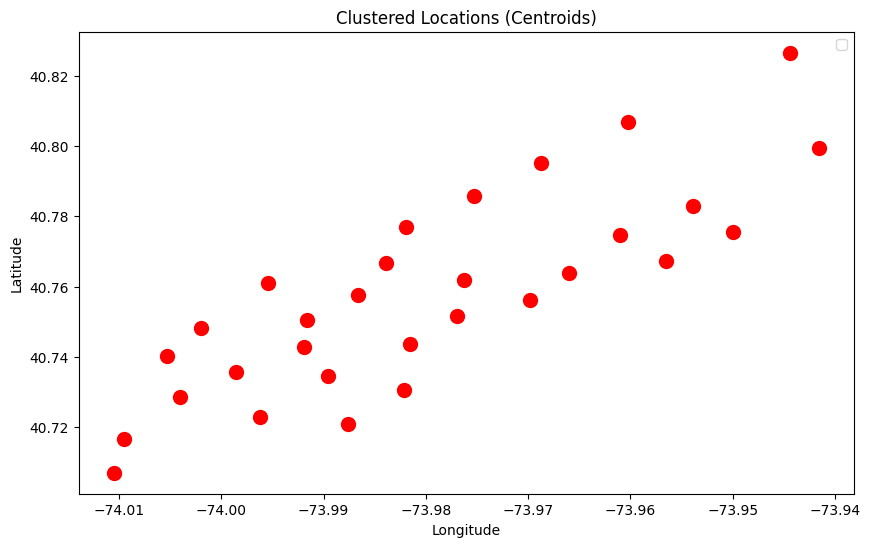

In [6]:
# Display information or perform further analysis on each location as needed
centroids_pickpup = kmeans_pickup.cluster_centers_

# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))
plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=100, c='red')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Cluster the dropoff

In [7]:
# Select only the relevant columns
coordinates_df = df[['dropoff_longitude', 'dropoff_latitude']]
# Use KMeans clustering with k=100 to identify locations
kmeans_dropoff = KMeans(n_clusters=n_clusters, random_state=42)
df['location_dropoff'] = kmeans_dropoff.fit_predict(coordinates_df) + n_clusters


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
centroids_dropoff = kmeans_dropoff.cluster_centers_

# Get the labels assigned to each data point during clustering
labels_dropoff = kmeans_dropoff.labels_+n_clusters

# Initialize an empty dictionary to store clusters
clusters_dropoff = {}

# Iterate over each centroid and its corresponding label
for idx, centroid in enumerate(centroids_dropoff):
    label = idx + n_clusters # Cluster label corresponds to centroid index
    # Find indices of data points assigned to this cluster
    cluster_indices = np.where(labels_dropoff == label)[0]
    # Store cluster label and indices in the dictionary
    clusters_dropoff[label] = cluster_indices
#clusters_dropoff

Visualization of both 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


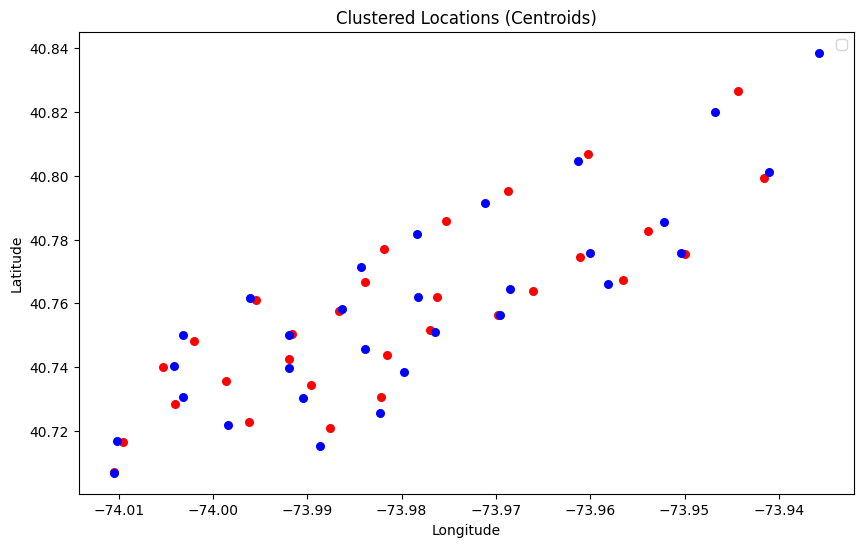

In [9]:
# Display information or perform further analysis on each location as needed
centroids_dropoff = kmeans_dropoff.cluster_centers_

# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))
plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff[:, 0], centroids_dropoff[:, 1], marker='o', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Unifying clusters that are very close to each other

In [10]:
#Create arrays to store pickups
picked_up_pickup_indices = []
picked_up_dropoff_indices = []
radius = 0.0024

# Create arrays to store pickups
picked_up_indices = []
closest_pickup_indices = []  # Store indices of closest pickup point for each picked up dropoff centroid

# Iterate through each dropoff centroid
for dropoff_index, dropoff_centroid in enumerate(centroids_dropoff):
    # Assume initially it's a dropoff
    is_pickup = False
    closest_pickup_index = None  # Store the index of the closest pickup point
    min_distance = float('inf')  # Initialize minimum distance to infinity
    # Iterate through each pickup centroid
    for pickup_index, pickup_centroid in enumerate(centroids_pickpup):
        # Calculate the Euclidean distance between the centroids
        distance = np.linalg.norm(pickup_centroid - dropoff_centroid)
        # If the distance is within the radius to any pickup centroid, classify as pickup
        if distance <= radius:
            is_pickup = True
            if distance < min_distance:  # If this pickup is closer than the previous closest one
                min_distance = distance
                closest_pickup_index = pickup_index
    # If it's within the radius of any pickup, classify as pickup, else keep it as a dropoff
    if is_pickup:
        picked_up_indices.append(dropoff_index)
        closest_pickup_indices.append(closest_pickup_index)

# Convert to numpy array
picked_up_indices = np.array(picked_up_indices)
closest_pickup_indices = np.array(closest_pickup_indices)



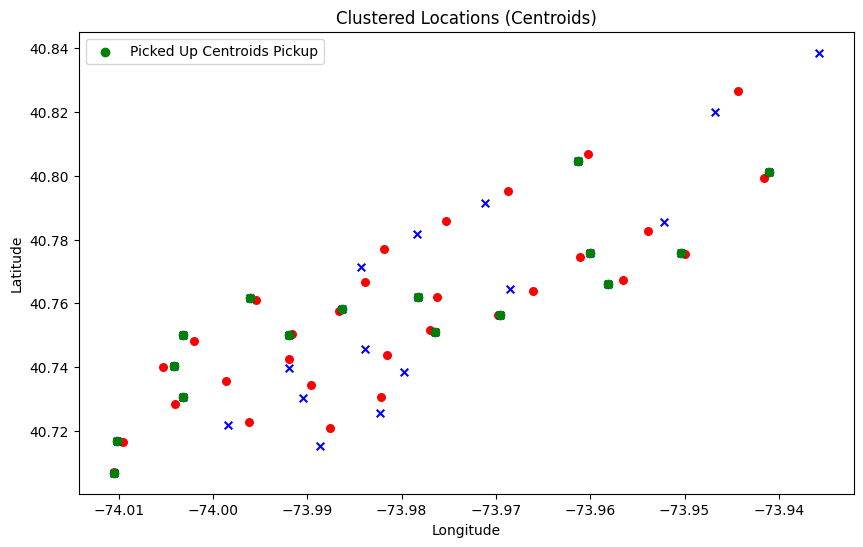

In [11]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff[:, 0], centroids_dropoff[:, 1], marker='x', s=30, c='blue')
plt.scatter(centroids_dropoff[picked_up_indices, 0], 
            centroids_dropoff[picked_up_indices, 1], 
            color='green', label='Picked Up Centroids Pickup')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Deleting dropff that are too close to pickpoints, they become the same

In [12]:
centroids_dropoff_filtered = np.delete(centroids_dropoff, picked_up_indices, axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


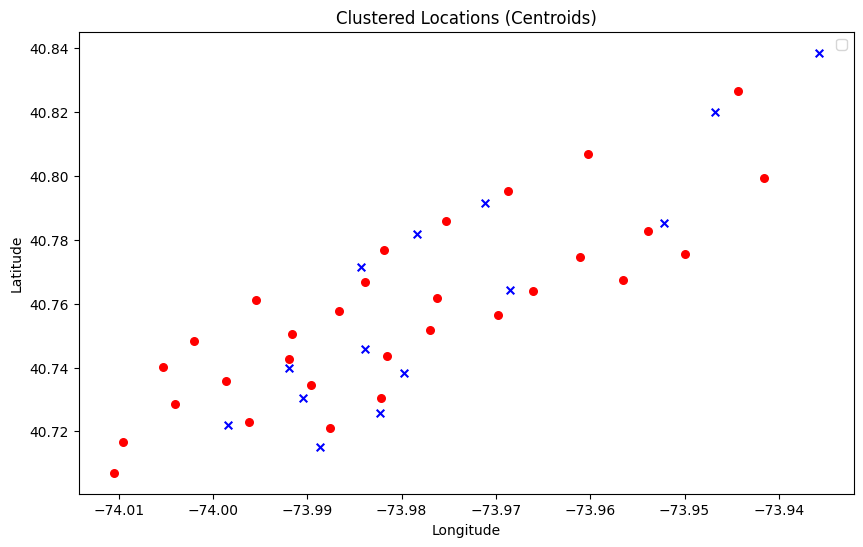

In [13]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff_filtered[:,0], centroids_dropoff_filtered[:,1], marker='x', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [14]:
picked_up_indices

array([ 0,  1,  3,  5,  6,  7,  8, 10, 15, 16, 20, 21, 22, 24, 27, 28])

In [15]:
closest_pickup_indices

array([13, 18,  8,  1, 22, 20,  7, 26, 25, 29, 23,  9, 12,  3,  5, 15])

In [16]:
for i, idx in enumerate(picked_up_indices):
    print(n_clusters+idx, closest_pickup_indices[i])
    #print(centroids_dropoff[idx])
    df.loc[df['location_dropoff'] == idx + n_clusters, 'location_dropoff'] = closest_pickup_indices[i]

30 13
31 18
33 8
35 1
36 22
37 20
38 7
40 26
45 25
46 29
50 23
51 9
52 12
54 3
57 5
58 15


In [17]:
np.unique(df['location_dropoff'])

array([ 1,  3,  5,  7,  8,  9, 12, 13, 15, 18, 20, 22, 23, 25, 26, 29, 32,
       34, 39, 41, 42, 43, 44, 47, 48, 49, 53, 55, 56, 59], dtype=int32)

In [18]:
df.to_csv("dataset/filtered_train_14_15_w_location.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


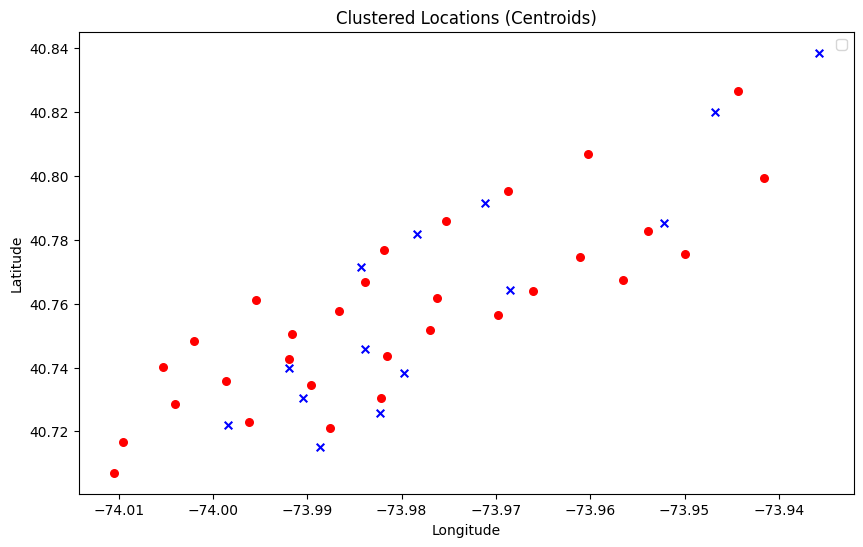

In [19]:
# Plot the clustered locations (centroids)
plt.figure(figsize=(10, 6))

plt.scatter(centroids_pickpup[:, 0], centroids_pickpup[:, 1], marker='o', s=30, c='red')
plt.scatter(centroids_dropoff_filtered[:,0], centroids_dropoff_filtered[:,1], marker='x', s=30, c='blue')
plt.title('Clustered Locations (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [20]:
total_points = np.concatenate([centroids_pickpup, centroids_dropoff_filtered])

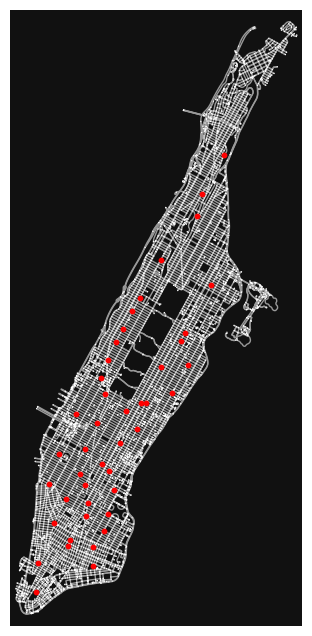

In [21]:
import osmnx as ox

# Retrieve the street network for Manhattan
graph_vanilla = ox.graph_from_place("Manhattan, New York, USA", network_type="drive_service")
fig, ax = ox.plot_graph(graph_vanilla, node_size=1, show=False, close=False)
for longitude, latitude in total_points:
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph_vanilla, longitude, latitude)
    ax.scatter(graph_vanilla.nodes[nearest_node]['x'], graph_vanilla.nodes[nearest_node]['y'], color='r', s=10)
plt.show()

Simplifying the graph. Only important roads

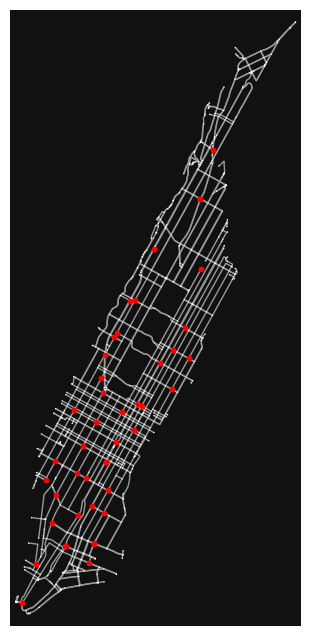

In [22]:

# Retrieve the street network for Manhattan, but simplified
graph = ox.graph_from_place("Manhattan, New York, USA", network_type="drive_service", custom_filter='["highway"~"primary|secondary"]')
fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False)
for longitude, latitude in total_points:
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color='r', s=10)
plt.show()


In [23]:
# Iterate over each point and find the nearest node in the graph
nearest_nodes = []
for latitude, longitude in total_points:
    nearest_node = ox.distance.nearest_nodes(graph, latitude, longitude)
    nearest_nodes.append(nearest_node)



# Initialize a list to store the routes
routes = []

# Calculate the routes between consecutive pairs of nearest nodes
for i in range(len(nearest_nodes) - 1):
    start_node = nearest_nodes[i]
    end_node = nearest_nodes[i + 1]
    route = ox.shortest_path(graph, start_node, end_node)
    routes.append(route)


Plot the graph. For full info, use graph_vanilla

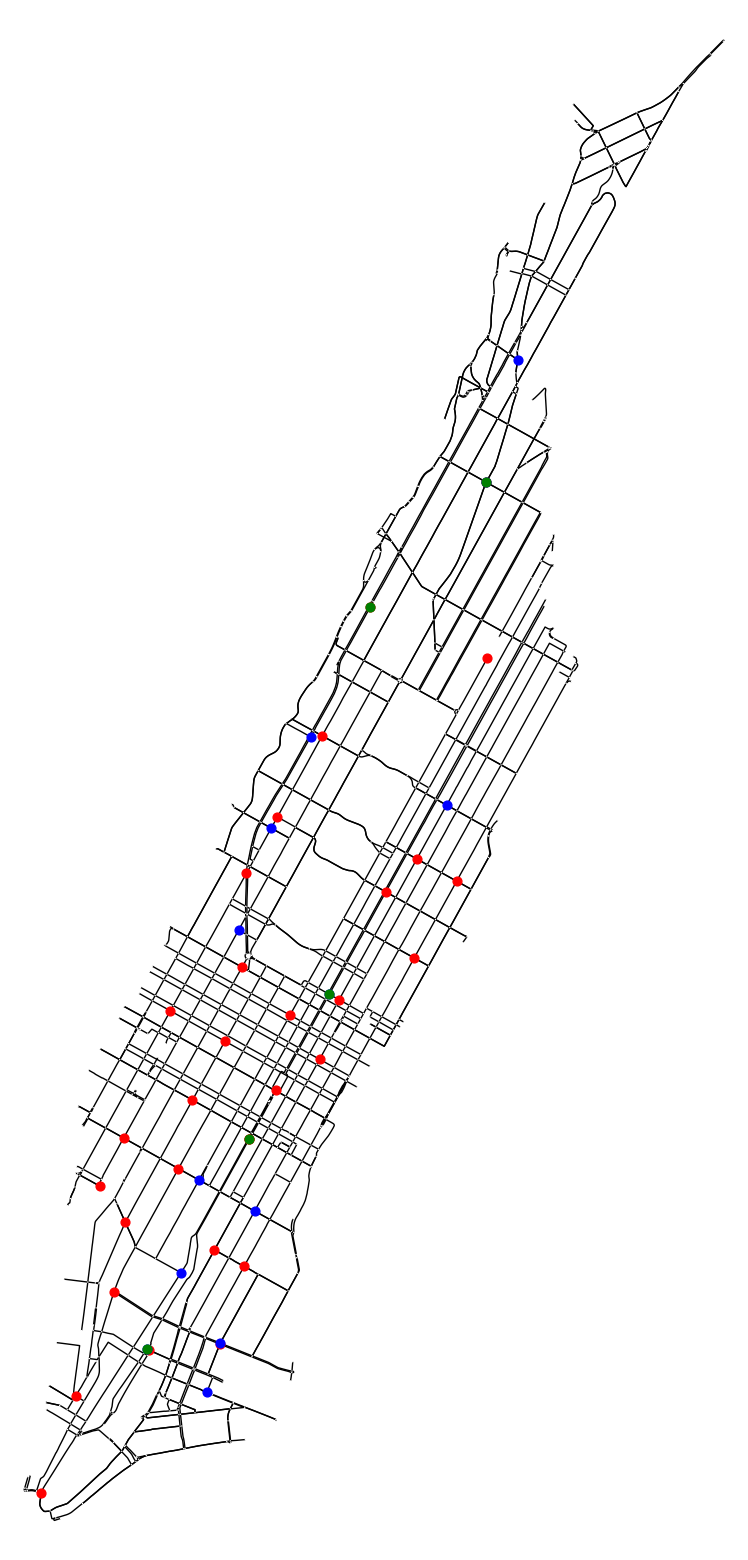

In [24]:
# Plot the street network with the calculated routes
fig, ax = ox.plot_graph(graph, node_size=1, show=False, close=False, figsize=(20,20), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='img/nyc_simplified.png')
color = 'r'
for idx,(longitude, latitude) in enumerate(total_points):
    if idx >len(centroids_pickpup):
        color = 'b'
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=40, alpha = 1)

# Extract latitude and longitude coordinates
latitudes = [point[1] for point in total_points]
longitudes = [point[0] for point in total_points]

# Find the range of latitude and longitude coordinates
lat_min, lat_max = min(latitudes), max(latitudes)
lon_min, lon_max = min(longitudes), max(longitudes)

# Divide the latitude and longitude range into 5 segments
lat_segments = np.linspace(lat_min, lat_max, num=6)
lon_segments = np.linspace(lon_min, lon_max, num=6)

# Find the middle point within each segment
contracted_points = []
for i in range(5):
    lat_middle = (lat_segments[i] + lat_segments[i+1]) / 2
    
    lon_middle = (lon_segments[i] + lon_segments[i+1]) / 2
    # Find the closest original point to this middle point
    closest_point_idx = np.argmin(np.linalg.norm(np.array(total_points) - [lon_middle, lat_middle], axis=1))
    closest_point = total_points[closest_point_idx]
    contracted_points.append(closest_point)
depots = []
for idx,(longitude, latitude) in enumerate(contracted_points):
    # Find the nearest node in the graph to the specified coordinates
    nearest_node = ox.distance.nearest_nodes(graph, longitude, latitude)
    depots += [nearest_node]
    ax.scatter(graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color="g", s=40, alpha = 1)


#fig.dpi = 300
#fig.set_figheight(20)
#fig.set_figwidth(20)
fig.savefig("img/nyc_simplified_info.png",dpi=300, bbox_inches='tight')
#fig.show()

In [25]:
real_locations = []
# Iterate over each point and find the nearest node in the graph
for latitude, longitude in  sorted(list(total_points)+list(contracted_points), key=lambda point: point[1]):
    nearest_node = ox.distance.nearest_nodes(graph, latitude, longitude)
    real_locations.append(nearest_node)

In [26]:
len(real_locations)

49

Finding relevant roads (roads passing through locations) and all the intersection nodes.

In [27]:
relevant_roads = []
for i,(u, v, data) in enumerate(graph.edges(data=True)):
    if (u in real_locations or v in real_locations) and'name' in data.keys():
        relevant_roads += [data["name"]]

intersection_nodes = [node for node, degree in dict(graph.degree()).items() if degree > 2 and graph.nodes[node]["y"] <= graph.nodes[real_locations[-1]]["y"]]
print(len(intersection_nodes))

702


In [28]:
filtered_in = []
for i,(u, v, data) in enumerate(graph.edges(data=True)):
    if "name" in data.keys() and (data["name"]) not in relevant_roads:
        if u in intersection_nodes and (u not in filtered_in):
            filtered_in += [u]
        if  v in intersection_nodes and(v not in filtered_in):
            filtered_in += [v]

Selecting only 100 important nodes

In [29]:
import random
def randomly_select_points(filtered_in, x):
    # Ensure x is not greater than the total number of points
    x = min(x, len(filtered_in))
    # Randomly select x points from filtered_in
    selected_points = random.sample(filtered_in, x)
    return selected_points

x = 100  # Number of points to randomly select
selected_points = randomly_select_points(filtered_in, x)
print(selected_points)

[42442671, 5004570632, 42442961, 588455698, 42453246, 42441299, 42437644, 8648032265, 561035372, 42427327, 42446093, 3831856757, 1825841693, 2141026518, 7480301865, 595352897, 42434439, 42450456, 42430761, 42430673, 42434092, 1061531634, 6330018917, 2821304137, 42455761, 42452067, 42449685, 42434249, 42430722, 42435650, 42432589, 247223720, 42430685, 42445392, 1773076513, 42439960, 42436701, 1773066054, 42421745, 42445365, 6173564360, 42444452, 42428037, 42437371, 42445378, 42430589, 42433743, 42445001, 1775260897, 42455662, 486867534, 42441949, 1825841704, 4347550074, 358448394, 5333189423, 4158749895, 42449971, 561035373, 7641820943, 11038072465, 1919595922, 42437996, 561035370, 42436477, 42432352, 246923513, 42442947, 589927943, 1701844698, 42435497, 42424672, 42424703, 7106818626, 5161246307, 42451650, 761293090, 427841071, 42445936, 1918039864, 42444055, 42432825, 42435663, 587934263, 6431058183, 7491182059, 42442584, 42445953, 42441947, 2711029280, 3786901743, 42433927, 749118205

In [30]:
def isolate_nodes(graph, f):
    graph_copy = graph.copy()
    return  graph_copy.subgraph(f)

# Call the function to remove non-'f' nodes
updated_graph = isolate_nodes(graph, intersection_nodes+real_locations)

In [31]:
len(real_locations)

49

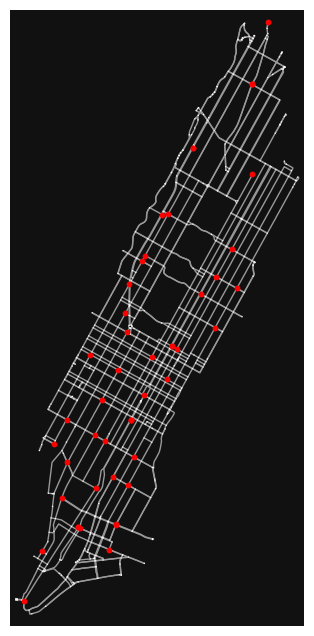

In [32]:
# Plot the filtered graph
fig, ax = ox.plot_graph(updated_graph, node_size=1, show=False, close=False)

# Plot the red nodes
for nearest_node in real_locations:
    color = "b"
    if nearest_node in real_locations:
        color = "r"
    ax.scatter(updated_graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=10)

plt.show()

In [33]:
nodes, edges = ox.graph_to_gdfs(updated_graph)

Make sures the locations are unique

In [34]:
real_locations_unique = list(set(real_locations))

In [35]:
nodes, edges = ox.graph_to_gdfs(updated_graph)
test_df = edges.copy()

In [36]:
routes=[]
from tqdm.notebook import tqdm
for selected_node in tqdm(depots+real_locations):
    min_route = [1]*200000
    not_done_nodes = []
    for n in real_locations_unique:
        if n == selected_node:
            continue
        route = ox.routing.shortest_path(updated_graph, selected_node, n, weight='length', cpus=1)
        if route is None:
            if n not in not_done_nodes:
                not_done_nodes+=[n]
            #print(n, route)
            continue
        routes += [route]

  0%|          | 0/54 [00:00<?, ?it/s]

In [37]:
not_done_nodes

[42429552]

In [38]:
fig, ax = ox.plot_graph(updated_graph, node_size=1, show=False, close=False)

# Plot the red nodes
for nearest_node in real_locations_unique[:6]:
    color = "b"
    ax.scatter(updated_graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=10)
plt.close()
fig, ax = ox.plot_graph_routes(updated_graph, routes[:20], route_colors='green', route_linewidth=1, node_size=1, figsize=(5,5), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='img/sneak_peak_roades.png', node_color = "r", ax = ax, show = True)
ax.clear()

plt.show()

In [39]:
routes = sorted(routes, key=lambda x: len(x), reverse=True)

In [40]:
seen = set()
unique_routes = []
for route in routes:
    # Convert the route list to a tuple so it's hashable
    route_tuple = tuple(route)
    if route_tuple not in seen:
        unique_routes.append(route)
        seen.add(route_tuple)
routes = unique_routes


Removing duplicates

In [41]:
no_duplicate_routes = [route for route_idx, route in enumerate(routes) if not any(set(route).issubset(set(other)) for other in routes[:route_idx] + routes[route_idx + 1:])]
no_duplicate_routes = sorted(no_duplicate_routes, key=lambda x: len(x), reverse=True)


In [42]:
def save_list_of_lists_to_txt(list_of_lists, filename):
    with open(filename, 'w') as f:
        for sublist in list_of_lists:
            line = ' '.join(map(str, sublist)) + '\n'
            f.write(line)

filename = 'list_of_lists.txt'

# Save the list of lists to a text file # Debugging
save_list_of_lists_to_txt(no_duplicate_routes, filename)

In [43]:
for a in no_duplicate_routes:
    if [42429334, 42429330] in a:
        print(a)

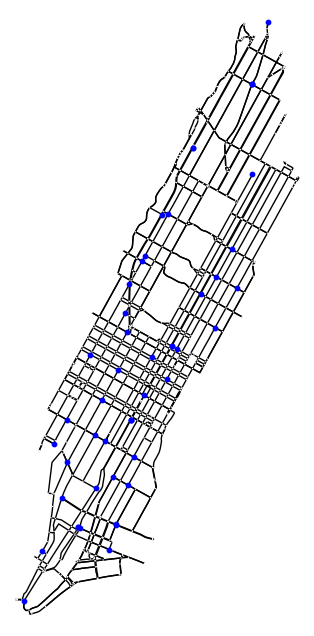

In [44]:
plt.close()# Plot the filtered graph
fig, ax = ox.plot_graph(updated_graph, node_size=1, show=False, close=False,bgcolor='white', edge_color='black')

# Plot the red nodes
for nearest_node in real_locations:
    color = "b"
    ax.scatter(updated_graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=10)

plt.show()
fig, ax = ox.plot_graph_routes(updated_graph, no_duplicate_routes, route_colors='blue',route_alpha=0.1, route_linewidth=0, node_size=1, figsize=(5,5), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='img/no_duplicate_routes.png', node_color = "r", ax = ax, show = True)
#fig, ax = ox.plot_graph_routes(updated_graph, new_routes[4:9], route_colors='blue', route_linewidth=0, node_size=1, figsize=(5,5), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='t3.png', node_color = "r", ax = ax, show = True)
#fig, ax = ox.plot_graph_routes(updated_graph, new_routes[9:15], route_colors='red', route_linewidth=0, node_size=1, figsize=(5,5), dpi=300,bgcolor='white', edge_color='black', save=True, filepath='t3.png', node_color = "r", ax = ax, show = True)
ax.clear()

In [45]:
graph_from_route = nx.Graph()
for route in no_duplicate_routes:
    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        graph_from_route.add_edge(node1, node2)

In [46]:
# Compute minimum spanning tree
mst = nx.minimum_spanning_tree(graph_from_route)

In [47]:
mst.edges()

EdgeView([(42433027, 42433020), (42433020, 42433014), (42433014, 42442671), (42442671, 42442664), (42442664, 42432999), (42442664, 42442651), (42432999, 42432985), (42432985, 42432963), (42432963, 42432929), (42432963, 42434262), (42432929, 7732243558), (7732243558, 6431058183), (6431058183, 42432897), (6431058183, 42435736), (42432897, 42439851), (42432897, 42432894), (42439851, 42439849), (42439849, 42433743), (42439849, 2141026498), (42433743, 2141026499), (42433743, 4016646214), (2141026499, 3099327964), (3099327964, 42426374), (42426374, 595703226), (595703226, 42432395), (595703226, 42432352), (42432395, 42450456), (42450456, 42443264), (42450456, 42446138), (42443264, 42443268), (42443264, 42446093), (42443264, 42443263), (42443268, 42429314), (42443268, 42446086), (42429314, 42449187), (42429314, 42429324), (42449187, 42435497), (42449187, 42433927), (42435497, 42440397), (42435497, 42435499), (42440397, 42436475), (42440397, 42446021), (42440397, 42427915), (42436475, 42447228

In [48]:
def make_fully_connected(graph, window = 8):
    missing_edges = []
    for i,u in enumerate(real_locations):
        range_low = window/2-i if i-window/2 < 0 else i-window/2
        range_high = len(real_locations)-window/2-1 if i+window/2 > len(real_locations)-1 else i+window/2
        for j in range(int(range_low), int(range_high)):
            v = real_locations[j]
            if (u,v) not in graph.edges():
                missing_edges.append((u, v))
    graph.add_edges_from(missing_edges)
    return graph

fully_connected_mst = make_fully_connected(mst.copy())

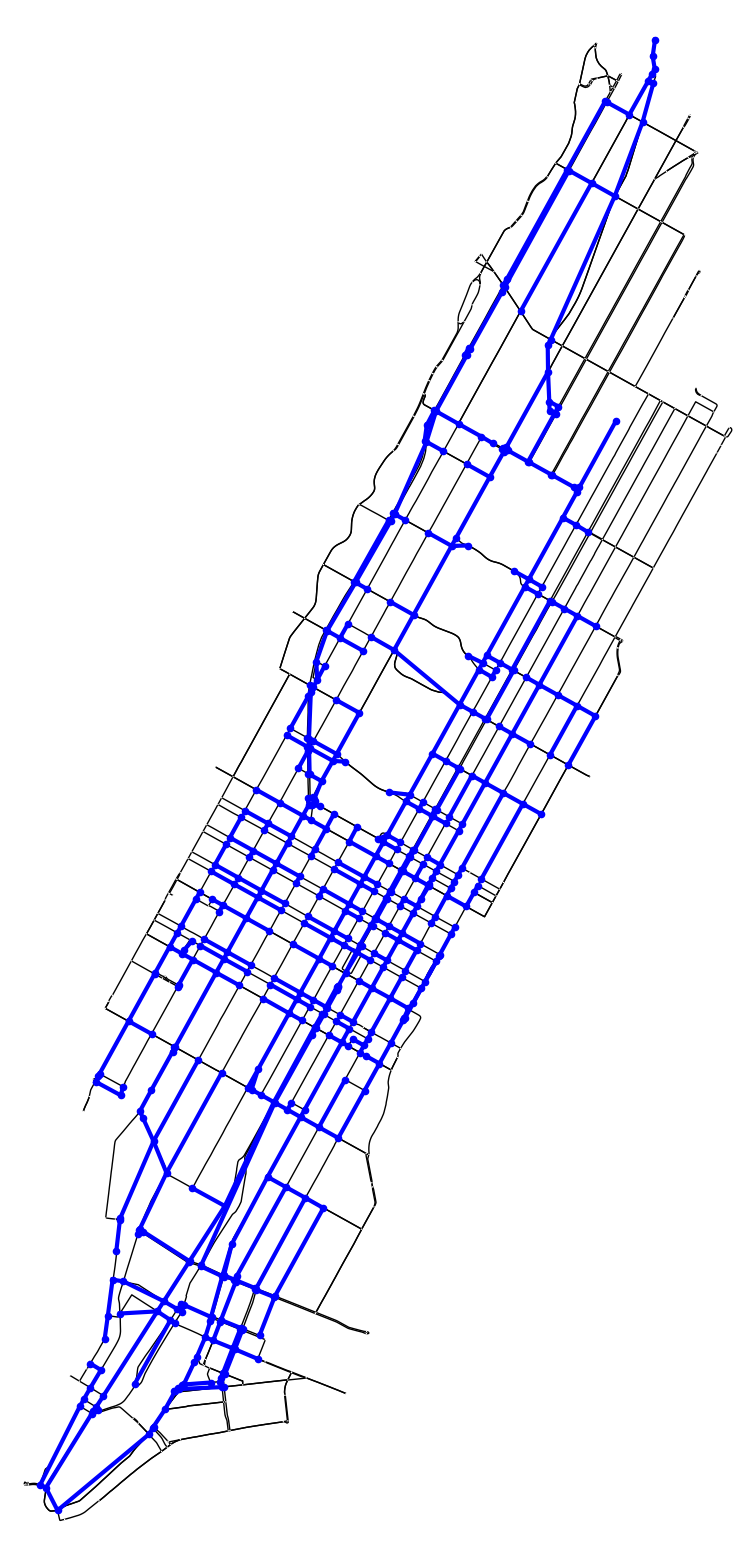

In [49]:
plt.close()# Plot the filtered graph
fig, ax = ox.plot_graph(updated_graph, node_size=1, show=False, close=False,bgcolor='white', edge_color='black', figsize=(20, 20))
# Plot the red nodes
for edge in mst.edges():
    node1, node2 = edge
    #print(node1, node2)
    # Get node coordinates
    x1, y1 = updated_graph.nodes[node1]['x'], updated_graph.nodes[node1]['y']
    x2, y2 = updated_graph.nodes[node2]['x'], updated_graph.nodes[node2]['y']
    # Plot edge
    ax.plot([x1, x2], [y1, y2], color='blue', linewidth=3)  # You can adjust color and linewidth as needed


for nearest_node in fully_connected_mst.nodes():
    color = "b"
    ax.scatter(updated_graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=20)



plt.savefig('img/new_york_simplified_roads.png', dpi=300, bbox_inches='tight')

plt.show()
ax.clear()

In [50]:
for i, node in enumerate(mst.nodes()):
    mst.nodes[node]['id'] = i
    if node in depots:
        mst.nodes[node]['depot'] = True
    else:
        mst.nodes[node]['depot'] = False
    #print(node)

In [51]:
nodes_df, edges_df = ox.graph_to_gdfs(graph)

In [52]:
nodes_df.head()

,y,x,highway,street_count,ref,geometry
osmid,,,,,,
42421728,40.798048,-73.960044,traffic_signals,3,NaN,POINT (-73.96004 40.79805)
42421737,40.799244,-73.962873,traffic_signals,4,NaN,POINT (-73.96287 40.79924)
42421741,40.800429,-73.965691,traffic_signals,4,NaN,POINT (-73.96569 40.80043)
42421745,40.801398,-73.967996,traffic_signals,4,NaN,POINT (-73.96800 40.80140)
42421749,40.801645,-73.968574,traffic_signals,1,NaN,POINT (-73.96857 40.80165)


In [53]:
edges_df.head()

osmid  \
u        v        key                                                      
42421728 42435346 0          [195743153, 990219223, 439801898, 68674967]   
         42425232 0                                            195743153   
         42421737 0    [195743201, 420625570, 420625573, 5668966, 420...   
42421737 42421728 0    [195743201, 420625570, 420625573, 5668966, 420...   
         42443381 0    [421853637, 1052940920, 420623117, 420625560, ...   

                                    name    highway maxspeed  oneway reversed  \
u        v        key                                                           
42421728 42435346 0    Central Park West  secondary   25 mph   False    False   
         42425232 0    Central Park West  secondary   25 mph   False     True   
         42421737 0    West 106th Street  secondary      NaN   False    False   
42421737 42421728 0    West 106th Street  secondary      NaN   False     True   
         42443381 0      Columbus Avenue    primary   25 mph    True    False   

                        length   lanes  \
u        v        key                    
42421728 42435346 0    295.537       4   
         42425232 0    720.182     NaN   
         42421737 0    272.804     NaN   
42421737 42421728 0    272.804     NaN   
         42443381 0    809.976  [3, 4]   

                                                                geometry  ref  \
u        v        key                                                           
42421728 42435346 0    LINESTRING (-73.96004 40.79805, -73.95996 40.7...  NaN   
         42425232 0    LINESTRING (-73.96004 40.79805, -73.96011 40.7...  NaN   
         42421737 0    LINESTRING (-73.96004 40.79805, -73.96017 40.7...  NaN   
42421737 42421728 0    LINESTRING (-73.96287 40.79924, -73.96275 40.7...  NaN   
         42443381 0    LINESTRING (-73.96287 40.79924, -73.96294 40.7...  NaN   

                      bridge width tunnel access junction  
u        v        key                                      
42421728 42435346 0      NaN   NaN    NaN    NaN      NaN  
         42425232 0      NaN   NaN    NaN    NaN      NaN  
         42421737 0      NaN   NaN    NaN    NaN      NaN  
42421737 42421728 0      NaN   NaN    NaN    NaN      NaN  
         42443381 0      NaN   NaN    NaN    NaN      NaN

In [54]:
def connect_all_roads(graph):
    check = []
    i= 0
    for u,_ in graph.nodes(data =True):
        #this gets all the nodes connected to u from the edges_df
        for v in edges_df.loc[(u, slice(None), slice(None))].index:
            if v[0] in graph.nodes():
                if  not graph.has_edge(u,v[0]):
                    graph.add_edge(u,v[0])
                    check += [u, v[0]]
                #if  not graph.has_edge(v[0], u):
                #    graph.add_edge(v[0], u)

    return graph, check

mst_roads_connected, check = connect_all_roads(mst.copy())

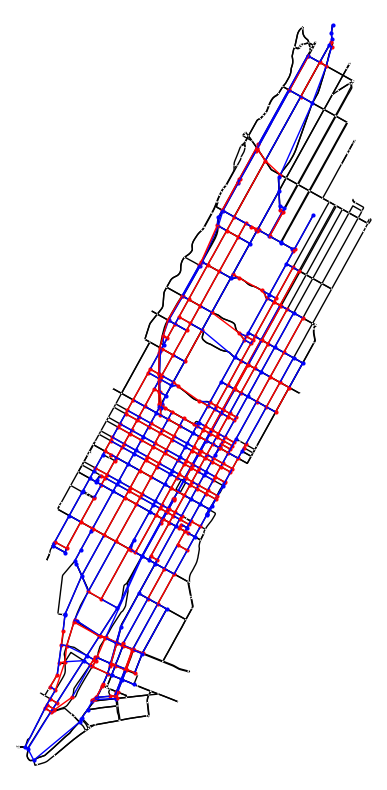

In [55]:

plt.close()# Plot the filtered graph
fig, ax = ox.plot_graph(updated_graph, node_size=1, show=False, close=False,bgcolor='white', edge_color='black', figsize=(10, 10))

for nearest_node in mst_roads_connected.nodes():
    color = "b"
    if nearest_node in check:
        color = "r"
    ax.scatter(updated_graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=4)
for edge in mst_roads_connected.edges():
    color = "b"
    
    node1, node2 = edge
    #print(node1, node2)
    # Get node coordinates
    x1, y1 = updated_graph.nodes[node1]['x'], updated_graph.nodes[node1]['y']
    x2, y2 = updated_graph.nodes[node2]['x'], updated_graph.nodes[node2]['y']
    # Plot edge
    if edge not in mst.edges():
        color = 'r'
    ax.plot([x1, x2], [y1, y2], color=color, linewidth=1)  # You can adjust color and linewidth as needed


plt.show()
ax.clear()

In [57]:
min_value = 23.804
max_value = 720.182

edges_to_add = []

for u,v, d in mst_roads_connected.edges(data = True):
    info = edges_df.loc[(u, v, slice(None))]
    if len(info)==0:
        d["name"] = f"{u}-{v}"
        d["length"] =  random.uniform(min_value, max_value)
        d["oneway"] = True
        d["lanes"] = random.uniform(1,6)
        d["maxspeed"] = 50
    
    else:
        d["name"] = info["name"][0]
        d["length"] = info["length"][0]
        d["oneway"] = info["oneway"][0]
        if isinstance(info["lanes"][0], list):
            lanes = max(info["lanes"][0])
        else:
            lanes = float(info["lanes"][0]) if info["lanes"][0] != np.nan else random.uniform(1,6)
        d["lanes"] = lanes
        d["maxspeed"] = int(info["maxspeed"][0].split(" ")[0]) if isinstance(info["maxspeed"][0], str) else np.nan
    
    if not d["oneway"]:
        edges_to_add+= [(u,v)]


In [58]:
for u, v in edges_to_add:
    mst.add_edge(v, u, data = mst.get_edge_data(u, v) )

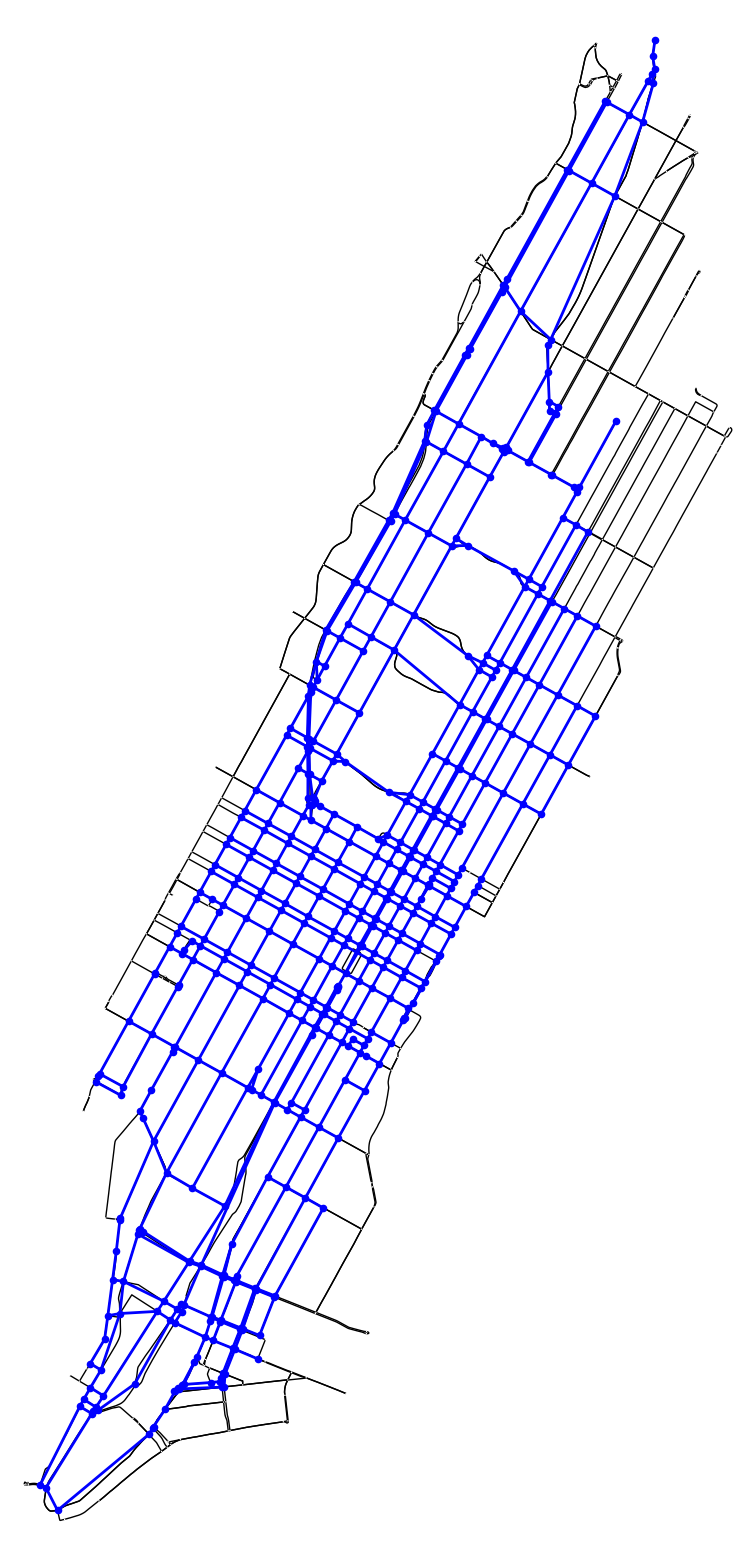

In [59]:
plt.close()# Plot the filtered graph
fig, ax = ox.plot_graph(updated_graph, node_size=1, show=False, close=False,bgcolor='white', edge_color='black', figsize=(20, 20))
# Plot the red nodes
for edge in mst_roads_connected.edges():
    node1, node2 = edge
    #print(node1, node2)
    # Get node coordinates
    x1, y1 = updated_graph.nodes[node1]['x'], updated_graph.nodes[node1]['y']
    x2, y2 = updated_graph.nodes[node2]['x'], updated_graph.nodes[node2]['y']
    # Plot edge
    ax.plot([x1, x2], [y1, y2], color='blue', linewidth=2)  # You can adjust color and linewidth as needed


for nearest_node in mst_roads_connected.nodes():
    color = "b"
    ax.scatter(updated_graph.nodes[nearest_node]['x'], graph.nodes[nearest_node]['y'], color=color, s=20)



plt.savefig('img/new_york_simplified_roads2.png', dpi=300, bbox_inches='tight')

plt.show()
ax.clear()

In [60]:
mst_digraph = nx.DiGraph(mst_roads_connected)

Saving the graph and df indormation

In [61]:
import pickle
with open("graph_from_routes_wd.pkl", "wb") as f:
    pickle.dump(mst_digraph, f, pickle.HIGHEST_PROTOCOL)

In [62]:
pp_to_nn = {}
dp_to_nn = {}
a = []
for idx,point in enumerate(total_points):
    index = np.where(np.all(centroids_pickpup == point, axis=1))[0]
    if len(index)==0:
        #continue
        index = np.where(np.all(centroids_dropoff == point, axis=1))[0]
        dp_to_nn[index[0] + n_clusters] = real_locations[idx]
    else:
        pp_to_nn[index[0]] = real_locations[idx]

In [63]:
pp_to_nn.items()

dict_items([(0, 588546891), (1, 42451593), (2, 42445357), (3, 9166033061), (4, 42430044), (5, 42430044), (6, 42430041), (7, 9166033062), (8, 4321748238), (9, 42428473), (10, 42440743), (11, 42440729), (12, 42430828), (13, 42442889), (14, 42437881), (15, 42436439), (16, 42430271), (17, 3786901738), (18, 3786901738), (19, 3786901738), (20, 42437909), (21, 42437654), (22, 9140654137), (23, 42449956), (24, 42428297), (25, 42432706), (26, 42450426), (27, 42447020), (28, 6177439750), (29, 6177439750)])

In [64]:
dp_to_nn.items()

dict_items([(32, 42435714), (34, 42436492), (39, 1241742563), (41, 42459137), (42, 42429342), (43, 9177424867), (44, 42442463), (47, 42429334), (48, 42447166), (49, 42442469), (53, 1061531593), (55, 42442534), (56, 42429552), (59, 6223571524)])

In [65]:
dict_ = pp_to_nn.copy()
dict_.update(dp_to_nn)


In [66]:
df["pickup_graph_node"] = df["location_pickup"].map(dict_)
df["dropoff_graph_node"] = df["location_dropoff"].map(dict_)

In [67]:
df.isna().sum()

Unnamed: 0            0
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
location_pickup       0
location_dropoff      0
pickup_graph_node     0
dropoff_graph_node    0
dtype: int64

In [68]:
df.to_csv("dataset/finished_dataset.csv")